# 0)Setup and Load Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.categorical import BoxPlotContainer

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("./SeoulBikeData.csv", encoding="latin1")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayOfWeek,Month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.002740,6.526027
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.998056,3.448048


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayOfWeek,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12


The dataset contains hourly bike rental counts along with weather and calendar-related variables. Data types and summary statistics provide an initial check of variable ranges and potential anomalies (e.g., zero-inflated precipitation variables). Converting Date to a proper datetime format enables time-based aggregations and pattern analysis.

# 1)Time-Based Visualizations

## 1.1) Time series - rentals over time (daily)

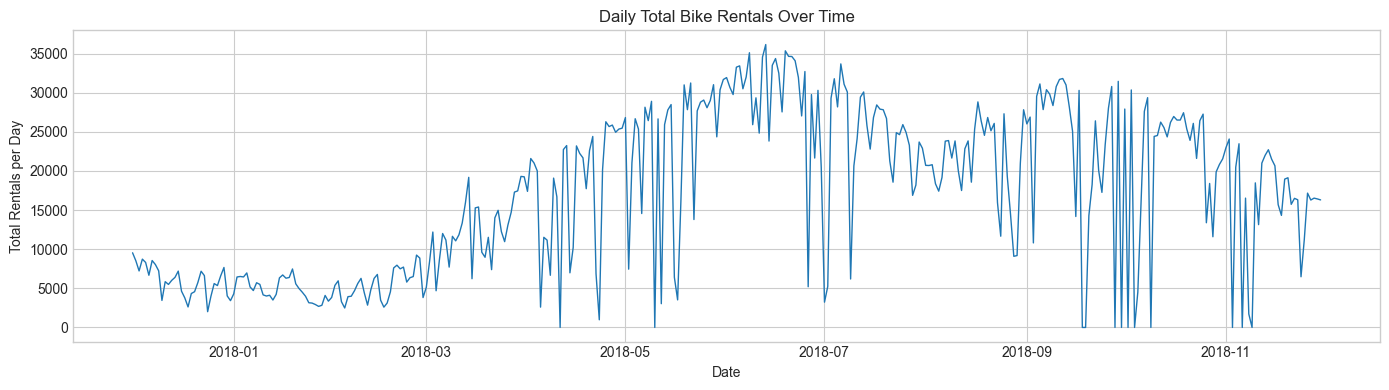

In [3]:
daily = df.groupby("Date")["Rented Bike Count"].sum().reset_index()

plt.figure(figsize=(14,4))
plt.plot(daily["Date"], daily["Rented Bike Count"], linewidth=1)
plt.title("Daily Total Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals per Day")
plt.tight_layout()
plt.show()


Daily rentals exhibit a strong seasonal cycle, with demand increasing from colder months toward summer and declining again into winter. The series also shows substantial day-to-day variability, likely driven by short-term weather changes (rain, temperature shifts), day-of-week effects, and holidays. This suggests that models should capture both long-term seasonality and short-term fluctuations.

## 1.2) Hourly pattern - average rentals by hour

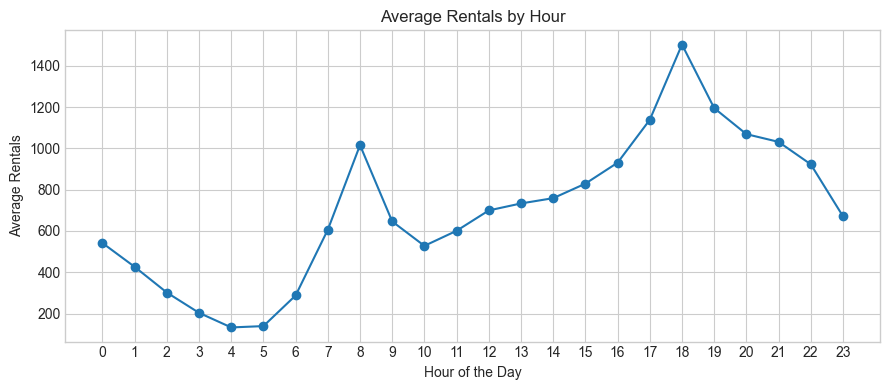

In [4]:
hourly = df.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(9,4))
hourly.plot(marker="o")
plt.xticks(range(0,24))
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()


The hourly profile shows a clear commuting signature with two pronounced peaks—typically around morning (≈8 AM) and evening (≈6 PM) rush hours—indicating that a large portion of rentals is linked to work/school travel. Night-time demand is consistently low, reflecting reduced mobility and station availability patterns.

## 1.3) Daily pattern - day of week

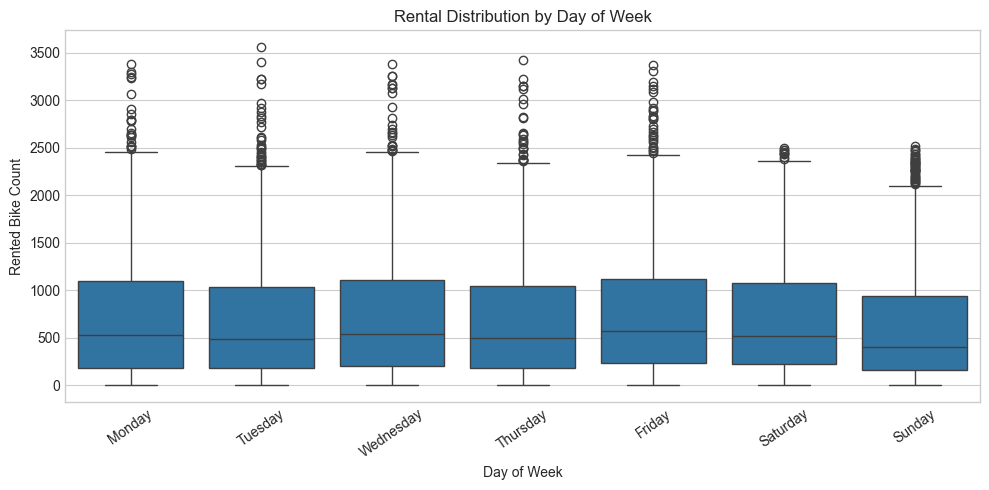

In [5]:
df["DayOfWeek"] = df["Date"].dt.day_name()

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="DayOfWeek", y="Rented Bike Count", order=order)
plt.title("Rental Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


Weekdays generally show higher median rentals and a wider spread, consistent with commuting demand and pronounced peaks at specific hours. Weekends tend to have lower typical demand and slightly reduced variability, reflecting a shift toward leisure-oriented usage rather than routine commuting. Sundays typically appear as the lowest-demand day, indicating reduced travel activity. The presence of high outliers—especially on weekdays—suggests occasional high-demand situations (e.g., exceptionally good weather, events, or seasonal spikes).

## 1.4) Seasonal pattern - rentals by season

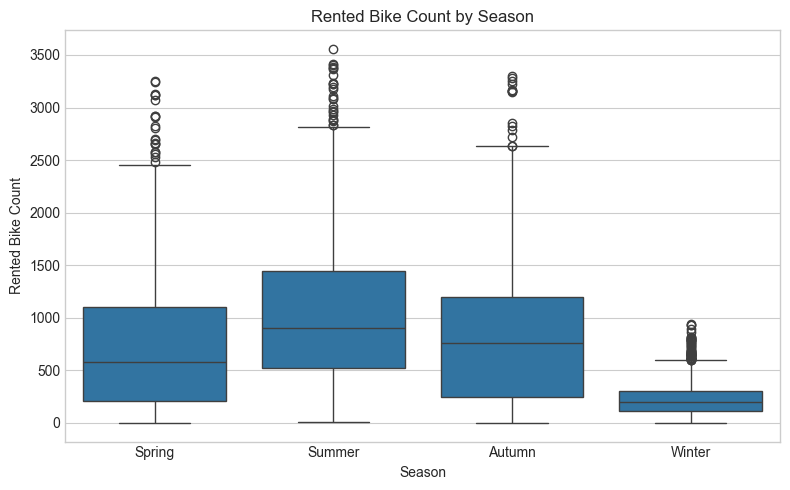

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Seasons",
    y="Rented Bike Count",
    order=["Spring","Summer","Autumn","Winter"]
)
plt.title("Rented Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Rented Bike Count")
plt.tight_layout()
plt.show()


Bike demand varies strongly across seasons. Summer shows the highest typical rentals (higher median and upper quartile), while winter shows the lowest demand, reflecting the impact of temperature, daylight, and overall comfort of cycling conditions. Spring and autumn lie between these extremes and often show broader overlaps depending on weather variability. The larger number of high-demand outliers in warmer seasons suggests that favorable conditions can trigger occasional demand surges beyond the typical range.

# 2) Distribution Visualizations

## 2.1) Histograms - numerical variables

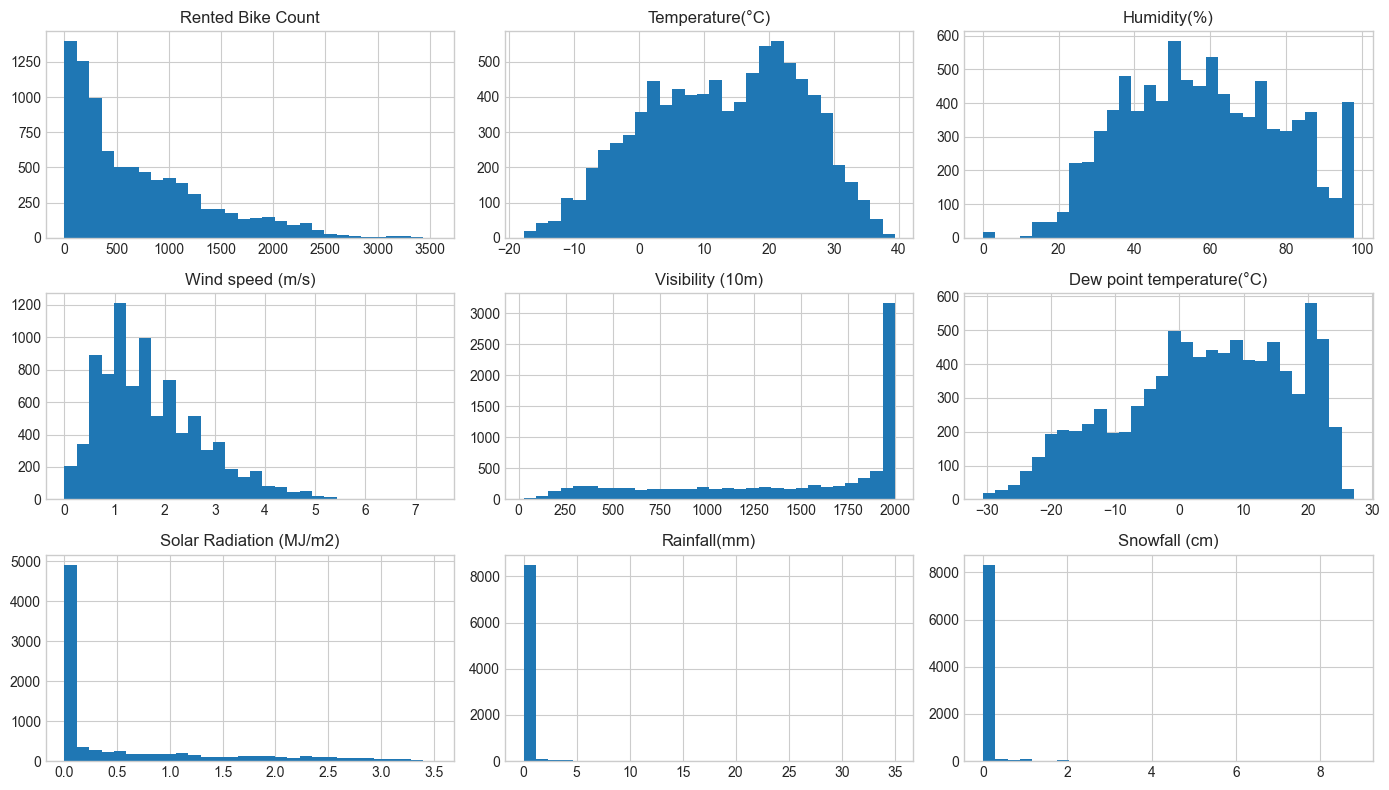

In [7]:
num_cols = [
    "Rented Bike Count",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[num_cols].hist(bins=30, figsize=(14,8))
plt.tight_layout()
plt.show()


The target variable (rented bike count) is strongly right-skewed: most hours have relatively low to moderate demand, while very high-demand hours occur less frequently. Several weather variables (especially rainfall and snowfall) are zero-inflated, meaning the majority of observations are zero with a small number of non-zero events—this is typical for precipitation data. Temperature and humidity show broader distributions consistent with seasonal variation, while wind speed tends to cluster at low values with a long right tail.

## 2.2) Boxplots - weather variables

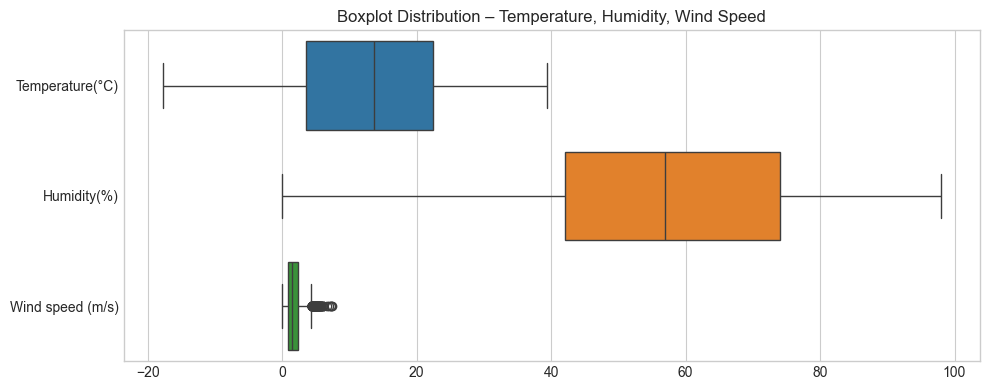

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[[
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)"
]], orient="h")
plt.title("Boxplot Distribution – Temperature, Humidity, Wind Speed")
plt.tight_layout()
plt.show()


Due to large differences in variable scales, weather boxplots are shown in separate groups. Temperature and humidity exhibit wide variability, while wind speed remains concentrated at low values. Rainfall and snowfall are highly zero-inflated with occasional extreme events, visible as outliers (shown in the below picture).

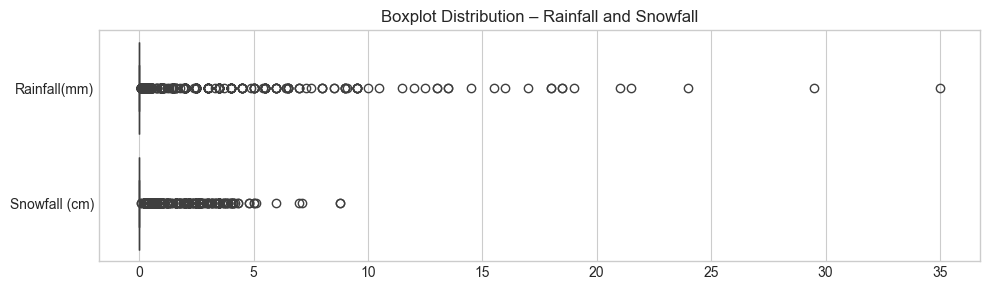

In [10]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df[[
    "Rainfall(mm)",
    "Snowfall (cm)"
]], orient="h")
plt.title("Boxplot Distribution – Rainfall and Snowfall")
plt.tight_layout()
plt.show()


# 3) Correlation Analysis

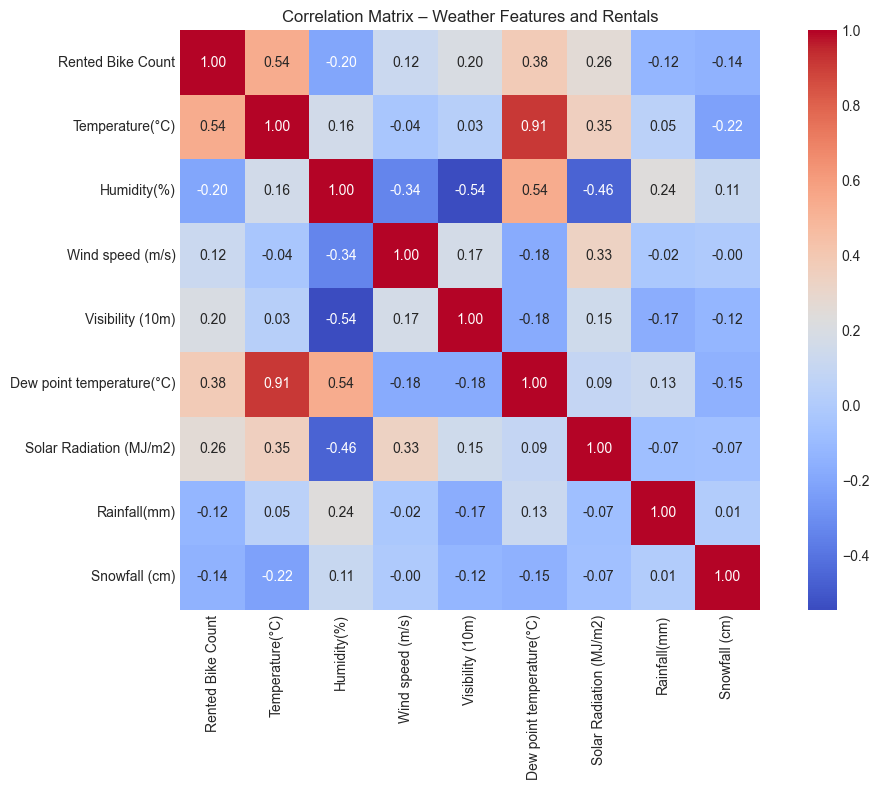

In [11]:
plt.figure(figsize=(11,8))
corr = df[num_cols].corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix – Weather Features and Rentals")
plt.tight_layout()
plt.show()



Temperature typically shows the strongest positive association with bike rentals (0.54), indicating higher demand in warmer conditions. Dew point temperature is also positively correlated with rentals, but it is very strongly correlated with temperature itself, suggesting partial redundancy (multicollinearity) between these variables. Rainfall and snowfall tend to show negative correlations with rentals, consistent with reduced cycling activity during precipitation. Other variables (e.g., wind speed, humidity, solar radiation) may show weaker or moderate correlations, implying that their effects could be non-linear or context-dependent and may be better captured by flexible models rather than linear assumptions.

# 4) Statistical Summaries

## 4.1) Average rentals by hour

In [12]:
df.groupby("Hour")["Rented Bike Count"].mean()


Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

The hourly averages quantify the strong intra-day variation and confirm the rush-hour structure observed in the hourly line plot.

## 4.2) Average rentals by day of week


In [13]:
df.groupby("DayOfWeek")["Rented Bike Count"].mean()


DayOfWeek
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: Rented Bike Count, dtype: float64

Day-of-week averages provide a compact summary of weekly demand differences. Even if differences in mean appear moderate, they can still be meaningful for operational planning and can interact with hour-of-day patterns (e.g., weekday commuter peaks vs weekend leisure patterns).

## 4.3) Average rentals by season

In [14]:
df.groupby("Seasons")["Rented Bike Count"].mean()


Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Seasonal averages quantify the magnitude of demand changes across seasons and confirm that seasonality is a major driver of bike usage, with summer having significantly higher mean.

## 4.4) Weather statistics

In [16]:
weather_cols = [
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[weather_cols].describe()



,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.882922,58.226256,1.724909,0.148687,0.075068
std,11.944825,20.362413,1.036300,1.128193,0.436746
min,-17.800000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,42.000000,0.900000,0.000000,0.000000
50%,13.700000,57.000000,1.500000,0.000000,0.000000
75%,22.500000,74.000000,2.300000,0.000000,0.000000
max,39.400000,98.000000,7.400000,35.000000,8.800000


The descriptive statistics confirm the distributional patterns: temperature and humidity span broad ranges, wind speed is generally low, and precipitation variables have very low medians but occasionally high maxima. If humidity contains rare 0% values, these are likely measurement artifacts and can be flagged as anomalies; given their low frequency, they typically do not materially affect overall patterns but are worth noting as a data quality detail.

# 5) Weekday vs Weekend Data

## 5.1 Weekday Average vs Weekend Average Rentals

  IsWeekend        mean  median  count
0   Weekday  719.448914   527.0   6264
1   Weekend  667.342147   463.0   2496


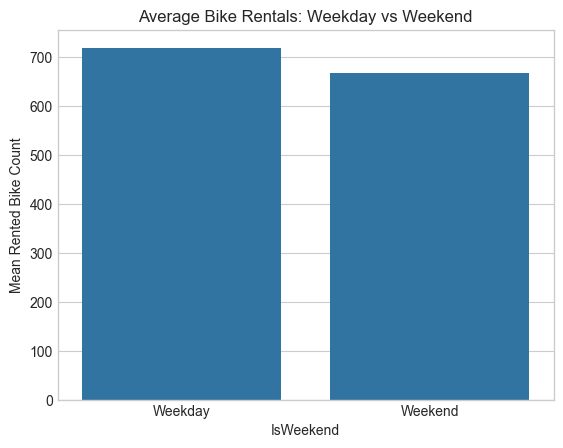

In [17]:
df['IsWeekend']= np.where(df['DayOfWeek'] >= 5, 'Weekend', 'Weekday')

agg = df.groupby('IsWeekend')['Rented Bike Count'].agg(['mean','median','count']).reset_index()
print(agg)

sns.barplot(x='IsWeekend', y='mean', data=agg)
plt.title('Average Bike Rentals: Weekday vs Weekend')
plt.ylabel('Mean Rented Bike Count')
plt.show()

Bike rentals are higher on weekdays than on weekends, with a higher mean (≈719 vs. ≈667) and median (527 vs. 463). This suggests stronger and more consistent demand during weekdays, likely driven by commuting and regular travel patterns. The lower weekend values indicate reduced overall usage, even though weekend trips may be more recreational in nature. Additionally, the much larger number of weekday observations reflects more frequent or longer weekday operating periods, which may also contribute to the higher average demand.

## 5.2 Hourly Bike Rentals Weekday vs Weekend

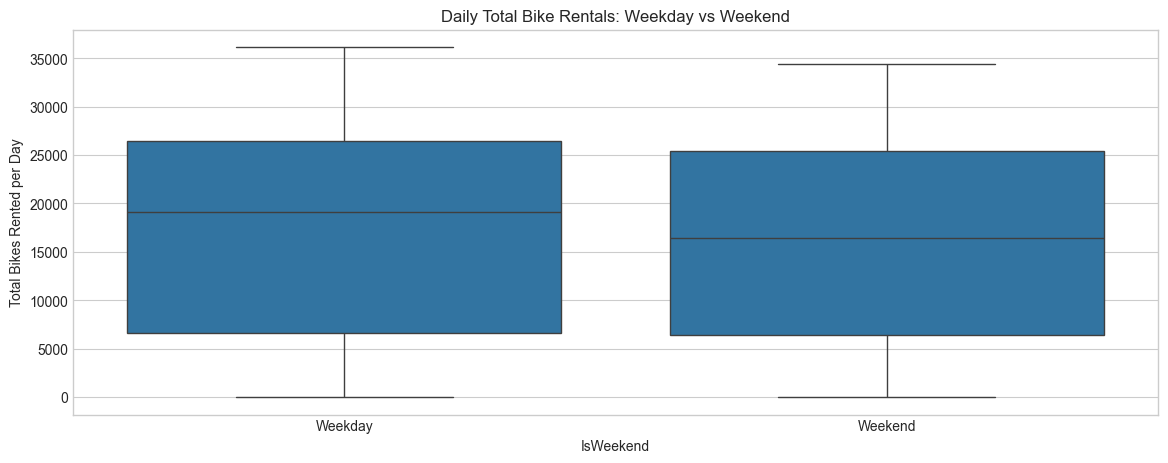

In [19]:
daily = df.groupby(['Date','IsWeekend'])['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(14,5))
sns.boxplot(x='IsWeekend', y='Rented Bike Count', data=daily)
plt.title('Daily Total Bike Rentals: Weekday vs Weekend')
plt.ylabel('Total Bikes Rented per Day')
plt.show()

## 5.3 Hourly Bike Rentals Weekday vs Weekend

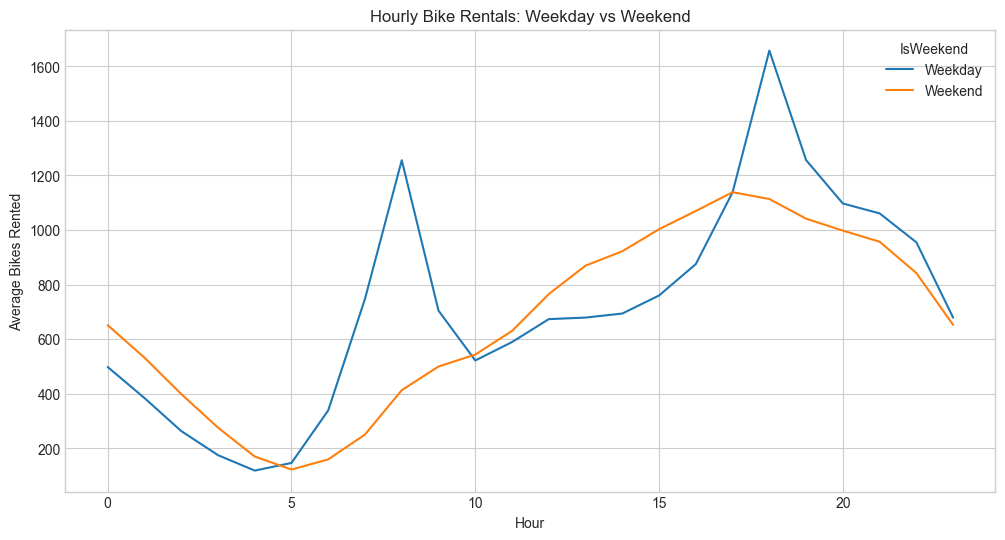

In [18]:
hourly = df.groupby(['IsWeekend', 'Hour'])['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='IsWeekend', data=hourly)
plt.title('Hourly Bike Rentals: Weekday vs Weekend')
plt.ylabel('Average Bikes Rented')
plt.show()

This graph confirms the assumptions made in Section 5.1. Weekday bike rentals show clear peaks during typical commuting hours, reflecting work-related travel patterns. In contrast, weekend rentals increase gradually throughout the day, peak in the late afternoon or early evening, and then steadily decline, which is consistent with more leisure-oriented usage.


# 6) Holiday Effects


## 6.1 Average Bike Rentals Holiday vs. Non-Holiday

      Holiday        mean  median  count
0     Holiday  499.756944   240.0    432
1  No Holiday  715.228026   524.5   8328


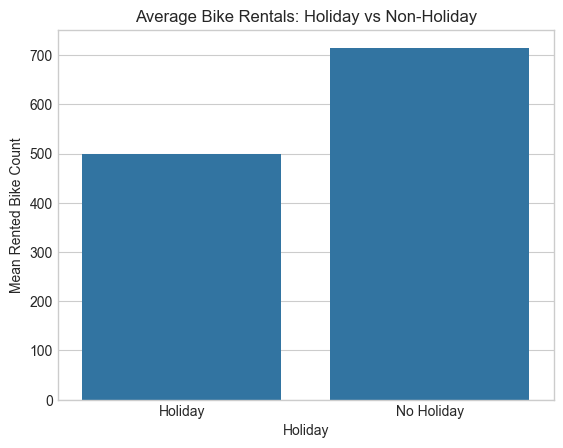

In [20]:
holiday_agg = df.groupby('Holiday')['Rented Bike Count'].agg(['mean','median','count']).reset_index()
print(holiday_agg)

sns.barplot(x='Holiday', y='mean', data=holiday_agg)
plt.title('Average Bike Rentals: Holiday vs Non-Holiday')
plt.ylabel('Mean Rented Bike Count')
plt.show()

Bike rentals are substantially lower on holidays compared to non-holidays, with both the mean (≈500 vs. ≈715) and median (240 vs. ≈525) showing a pronounced drop in demand. This suggests that holidays significantly reduce overall bike usage, likely due to decreased commuting and altered daily routines. The much smaller number of holiday observations also indicates that holidays are relatively infrequent, but their impact on demand is strong and consistent.

## 6.2 Average Hourly Bike Rentals Holiday vs. Non-Holiday

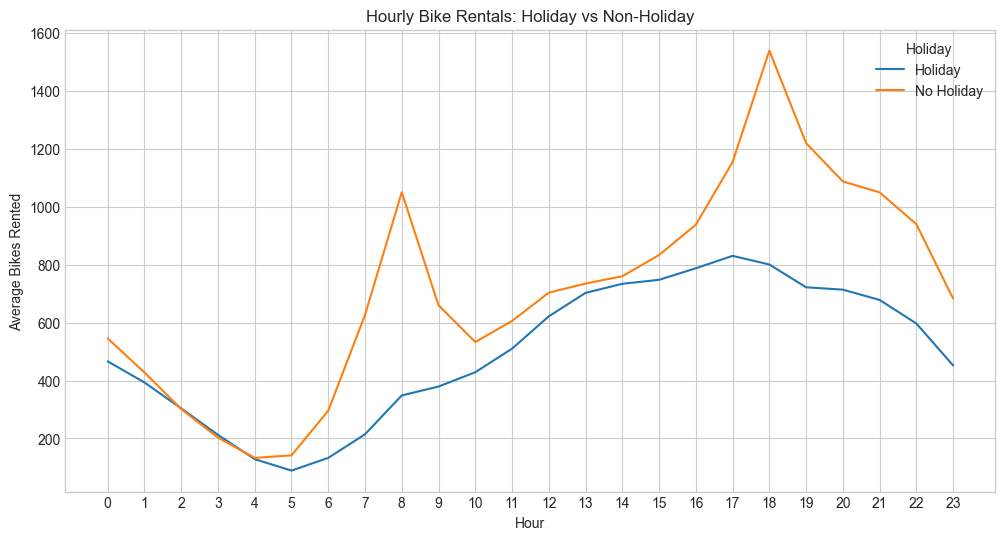

In [21]:
hourly_holiday = df.groupby(['Holiday','Hour'])['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=hourly_holiday)
plt.title('Hourly Bike Rentals: Holiday vs Non-Holiday')
plt.ylabel('Average Bikes Rented')
plt.xticks(range(0,24))
plt.show()

Similar to the weekday versus weekend comparison, this graph highlights the impact of commuting behavior on bike rentals. Non-holiday days exhibit pronounced spikes during typical commuting hours, which explains the higher rental volumes observed on non-holidays. In contrast, holidays lack these peaks, reflecting reduced commuting activity and overall lower demand.

# 7) Weather Threshold Analysis

## 7.1 Temperature Threshold Analysis

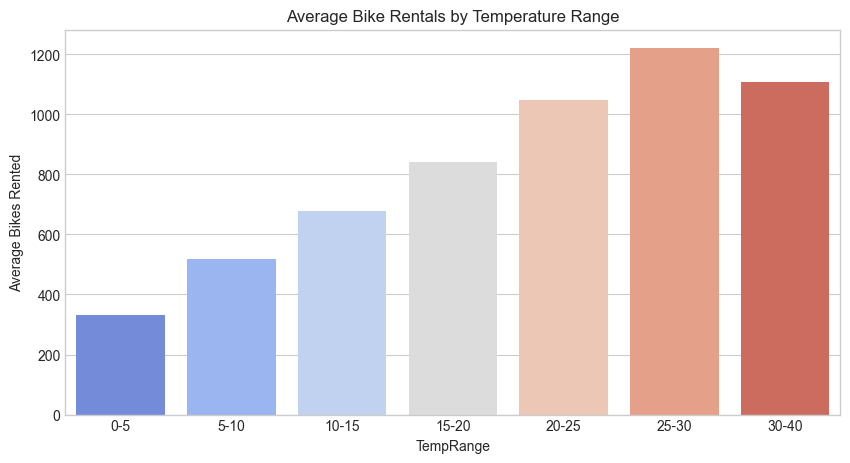

In [23]:
temp_bins = [0, 5, 10, 15, 20, 25, 30, 40]
temp_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-40']
df['TempRange'] = pd.cut(df['Temperature(°C)'], bins=temp_bins, labels=temp_labels)

temp_agg = df.groupby('TempRange', observed=True)['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='TempRange', y='Rented Bike Count', data=temp_agg, hue='TempRange', dodge=False, palette='coolwarm', legend=False)
plt.title('Average Bike Rentals by Temperature Range')
plt.ylabel('Average Bikes Rented')
plt.show()

The Average bike rentals by temperatue show lowest bike rentals occurring when its cold

## 7.2 Rainfall Threshold Analysis

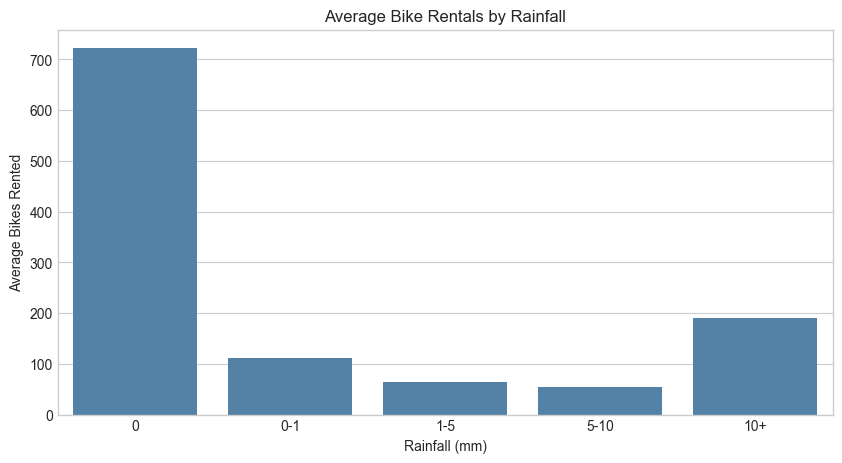

In [25]:
rain_bins = [0, 1, 5, 10, 20, 50]
rain_labels = ['0', '0-1', '1-5', '5-10', '10+']

df['RainRange'] = pd.cut(
    df['Rainfall(mm)'],
    bins=rain_bins,
    labels=rain_labels,
    include_lowest=True
)

rain_agg = (
    df.groupby('RainRange', observed=True)['Rented Bike Count']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(
    x='RainRange',
    y='Rented Bike Count',
    data=rain_agg,
    color='steelblue'
)
plt.title('Average Bike Rentals by Rainfall')
plt.ylabel('Average Bikes Rented')
plt.xlabel('Rainfall (mm)')
plt.show()

Rainfall has a strong negative impact on bike rentals. When there is no rain, average rentals are high at around ≈725, indicating normal usage levels. However, even light rainfall of approximately 1 mm leads to a sharp decline in demand, with rentals dropping to ≈125. This suggests that bike usage is highly sensitive to rainfall, as even minimal precipitation significantly discourages riders.

## 7.3 Humidity Threshold Analysis

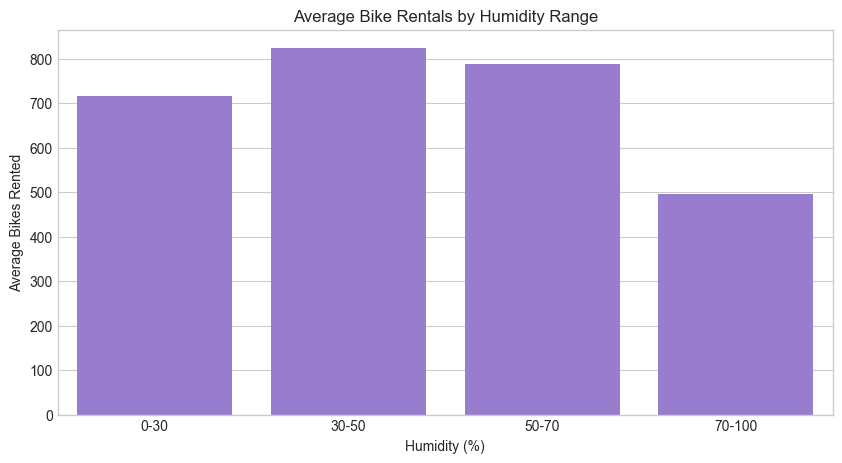

In [35]:
humidity_bins = [0, 30, 50, 70, 100]
humidity_labels = ['0-30', '30-50', '50-70', '70-100']

df['HumidityRange'] = pd.cut(df['Humidity(%)'],bins=humidity_bins,labels=humidity_labels)

humidity_agg = (df.groupby('HumidityRange', observed=True)['Rented Bike Count'].mean().reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x='HumidityRange',y='Rented Bike Count',data=humidity_agg,color='mediumpurple')
plt.title('Average Bike Rentals by Humidity Range')
plt.ylabel('Average Bikes Rented')
plt.xlabel('Humidity (%)')
plt.show()

The graph shows that bike rentals are highest at moderate humidity levels, peaking in the 30–50% range. Rentals remain fairly strong in the 50–70% range but begin to decline as humidity increases. At very high humidity (70–100%), average bike rentals drop sharply, suggesting that overly humid conditions discourage people from riding. Overall, moderate humidity appears to be the most comfortable and popular condition for bike use.

## 7.4 Wind Speed Threshold Analysis

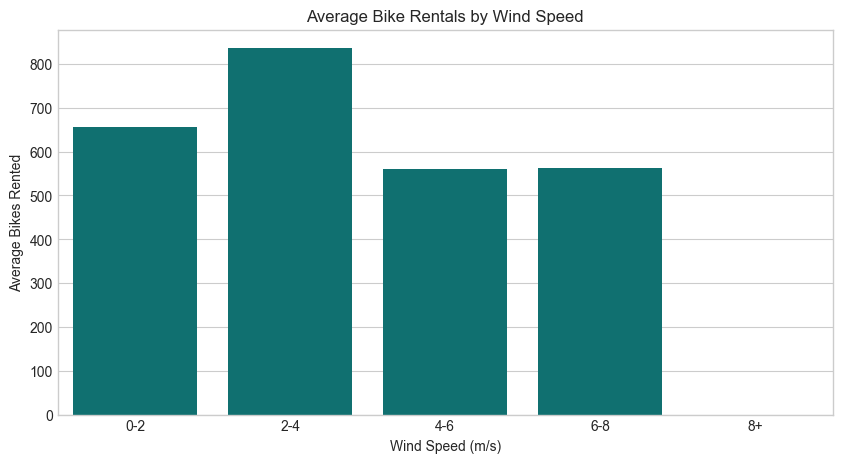

In [28]:
wind_bins = [0, 2, 4, 6, 8, 15]
wind_labels = ['0-2', '2-4', '4-6', '6-8', '8+']

df['WindRange'] = pd.cut(
    df['Wind speed (m/s)'], bins=wind_bins, labels=wind_labels)

wind_agg = (df.groupby('WindRange', observed=True)['Rented Bike Count'].mean().reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x='WindRange',y='Rented Bike Count',data=wind_agg,color='teal')
plt.title('Average Bike Rentals by Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Average Bikes Rented')
plt.show()

The wind speed chart shows that bike rentals are highest at low to moderate wind speeds, peaking in the 2–4 m/s range. Rentals decline as wind speeds increase, with noticeably lower usage at 4–6 m/s and above, suggesting that stronger winds discourage biking.

## 7.5 Snowfall Speed Threshold Analysis

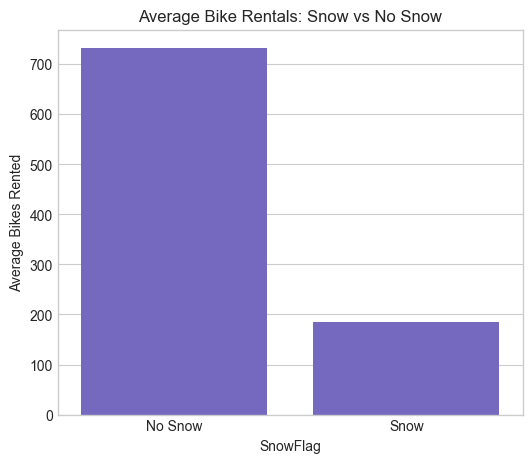

In [30]:
df['SnowFlag'] = np.where(df['Snowfall (cm)'] > 0, 'Snow', 'No Snow')

snow_agg = (df.groupby('SnowFlag')['Rented Bike Count'].mean().reset_index())

plt.figure(figsize=(6,5))
sns.barplot(x='SnowFlag',y='Rented Bike Count',data=snow_agg,color='slateblue')
plt.title('Average Bike Rentals: Snow vs No Snow')
plt.ylabel('Average Bikes Rented')
plt.show()

The snow comparison reinforces this previously seen patterns, showing that bike rentals are much higher on days without snow, while snowy conditions lead to a sharp drop in average rentals.


# 8) Outlier and Anomaly Detection

## 8.1 Visual Outlier Detection: BoxPlot

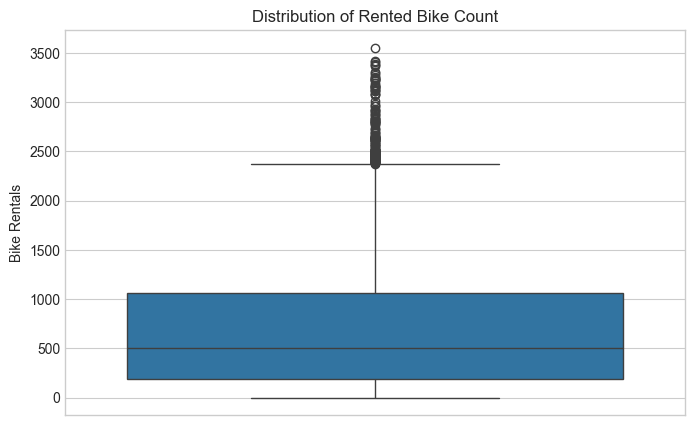

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')
plt.ylabel('Bike Rentals')
plt.show()

This box plot shows that bike rental counts are widely distributed, with most values concentrated in the lower to mid range. The median rental count appears relatively low compared to the maximum values, indicating a right-skewed distribution. A large number of high-end outliers are present, suggesting that on certain days—likely under ideal conditions or peak seasons—bike rentals increase dramatically. Overall, typical daily rentals are moderate, but occasional spikes drive the upper end of the distribution.

## 8.2 IQR Outlier Detection


In [37]:
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df['Rented Bike Count'] < lower_bound) |
    (df['Rented Bike Count'] > upper_bound)
]

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")

Lower bound: -1120.375
Upper bound: 2376.625
Number of outliers: 158


These IQR results indicate that most bike rental counts fall between –1120.375 and 2376.625, with values above the upper bound classified as outliers. Since rental counts cannot be negative, the lower bound mainly reflects the spread of the data rather than meaningful low outliers. The presence of 158 outliers above the upper bound suggests there are some days with exceptionally high bike usage, likely driven by favorable weather, seasonal effects, or special events. This confirms that the distribution is heavily right-skewed, with frequent high-demand spikes.

## 8.3 Highest Values Among High Demand Outliers

In [39]:
outliers[['Date', 'Hour', 'Rented Bike Count', 'Holiday', 'IsWeekend']].sort_values(
    'Rented Bike Count',
    ascending=False).head(10)

,Date,Hour,Rented Bike Count,Holiday,IsWeekend
4818,2018-06-19,18,3556,No Holiday,Weekday
4866,2018-06-21,18,3418,No Holiday,Weekday
4650,2018-06-12,18,3404,No Holiday,Weekday
4842,2018-06-20,18,3384,No Holiday,Weekday
4458,2018-06-04,18,3380,No Holiday,Weekday
4890,2018-06-22,18,3365,No Holiday,Weekday
4554,2018-06-08,18,3309,No Holiday,Weekday
6810,2018-09-10,18,3298,No Holiday,Weekday
6978,2018-09-17,18,3277,No Holiday,Weekday
6858,2018-09-12,18,3256,No Holiday,Weekday


These highest-demand outliers show a very clear pattern. All of the extreme rental counts occur at 6 PM (hour 18) on weekdays, with no holidays, indicating a strong evening commute effect rather than leisure riding. The dates are concentrated in June and September, which typically have favorable weather conditions, further boosting demand. Together, this suggests that the outliers are not anomalies or data errors, but expected peaks driven by weekday rush-hour commuting during ideal seasons, explaining why rental counts far exceed the typical range on these days.

## 8.4 Lowest Values Among High Demand Outliers

In [38]:
outliers[['Date', 'Hour', 'Rented Bike Count', 'Holiday', 'IsWeekend']].sort_values(
    'Rented Bike Count').head(10)

,Date,Hour,Rented Bike Count,Holiday,IsWeekend
4461,2018-06-04,21,2377,No Holiday,Weekday
4821,2018-06-19,21,2378,No Holiday,Weekday
7554,2018-10-11,18,2378,No Holiday,Weekday
3928,2018-05-13,16,2379,No Holiday,Weekend
4745,2018-06-16,17,2383,No Holiday,Weekend
4940,2018-06-24,20,2387,No Holiday,Weekend
6848,2018-09-12,8,2391,No Holiday,Weekday
3785,2018-05-07,17,2392,No Holiday,Weekday
7266,2018-09-29,18,2397,No Holiday,Weekend
5156,2018-07-03,20,2398,No Holiday,Weekday


These outliers are more spread across different hours and days, suggesting they are not driven by a single dominant pattern like rush-hour commuting. Low outliers are often associated with unfavorable conditions such as poor weather, off-peak hours (late night or early morning), or reduced travel demand. Unlike high outliers, which reflect predictable peaks, these low values likely capture temporary drops in usage caused by external factors rather than normal daily travel behavior.

## 8.5 Absolute Low Demand Bike Rental

In [43]:
low_demand = df[df['Rented Bike Count'] < 10]
low_demand[['Date', 'Hour', 'Rented Bike Count', 'Snowfall (cm)', 'Rainfall(mm)', 'Temperature(°C)']].head()

,Date,Hour,Rented Bike Count,Snowfall (cm),Rainfall(mm),Temperature(°C)
222,2017-12-10,6,9,2.7,2.5,-0.5
559,2017-12-24,7,3,0.0,0.0,4.7
560,2017-12-24,8,4,0.0,0.0,4.6
561,2017-12-24,9,3,0.0,6.4,4.6
562,2017-12-24,10,4,0.0,0.0,4.8


These outliers for low bike demand align closely with adverse weather and seasonal effects. The presence of snowfall (2.7 cm), rainfall, and near-freezing temperatures strongly suggests that harsh winter conditions significantly suppress bike usage. Even on dates with little or no snow, the cold temperatures and precipitation, combined with early morning hours, likely reduce riders’ willingness to bike. Overall, these observations indicate that weather severity—especially cold, snow, and rain—is a key driver behind the most extreme drops in bike rentals, reinforcing weather’s dominant influence on low-demand outliers.

## 8.6 Top 1% High Demand Bike Rentals

In [45]:
high_demand = df[df['Rented Bike Count'] > df['Rented Bike Count'].quantile(0.99)]
high_demand[['Date', 'Hour', 'Rented Bike Count','Temperature(°C)', 'IsWeekend', 'Holiday']].head()

,Date,Hour,Rented Bike Count,Temperature(°C),IsWeekend,Holiday
3282,2018-04-16,18,2692,17.0,Weekday,No Holiday
3498,2018-04-25,18,2807,21.2,Weekday,No Holiday
3522,2018-04-26,18,2574,17.4,Weekday,No Holiday
3546,2018-04-27,18,2577,20.3,Weekday,No Holiday
3618,2018-04-30,18,2558,23.0,Weekday,No Holiday


These records represent high but non-extreme demand periods and show a very consistent pattern. All observations occur at 6 PM on weekdays with no holidays, reinforcing the importance of the evening commute in driving bike usage. Temperatures range from 17°C to 23°C, which are comfortable and ideal for cycling, helping explain the elevated rental counts. Unlike the most extreme outliers, these values likely reflect normal peak-hour demand under favorable weather conditions, rather than unusual or exceptional events.